# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important Notice**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings with established methodologies and consult domain experts when necessary.

## Overview

This notebook explores Dandiset 001375, titled "Septum GABA disruption with DREADDs". This is a pilot study investigating the effects of disrupting septal gabaergic activity using DREADDs (Designer Receptors Exclusively Activated by Designer Drugs) on hippocampal and neocortical activity.

Dandiset URL: https://dandiarchive.org/dandiset/001375

In this notebook, we will:
1. Connect to the DANDI archive and retrieve metadata about the Dandiset
2. Explore the available NWB files in the dataset
3. Load and examine the structure of one of the NWB files
4. Visualize some of the electrophysiology data
5. Explore spike times from recorded units
6. Analyze trial/lap information

## Required Packages

The following packages are required to run this notebook:

- `dandi`: For connecting to the DANDI archive
- `pynwb`: For working with NWB files
- `h5py`: For working with HDF5 files (underlying NWB format)
- `remfile`: For remote file access
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `pandas`: For data manipulation
- `seaborn`: For enhanced visualizations

## Loading the Dandiset

In [1]:
# Import necessary packages
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import remfile
import h5py
import pynwb
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set seaborn style for better visualizations
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset description: {metadata['description']}")

# Handle contributors - they could be strings or dictionaries
contributors = metadata.get('contributor', [])
if contributors:
    if isinstance(contributors[0], str):
        contributors_str = ', '.join(contributors)
    else:
        # If contributors are dictionaries, try to extract meaningful information
        contributors_str = ', '.join(str(c) for c in contributors)
    print(f"Contributors: {contributors_str}")
else:
    print("Contributors: None listed")
    
print(f"Dandiset URL: https://dandiarchive.org/dandiset/001375")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAsset details:")
for i, asset in enumerate(assets):
    print(f"- {asset.path} ({asset.size / 1e9:.2f} GB)")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: {'name': 'Eckert, Michael', 'email': 'meckert1@uci.edu', 'roleName': ['dcite:ContactPerson'], 'schemaKey': 'Person', 'affiliation': [], 'includeInCitation': True}, {'name': 'NIH Brain', 'roleName': ['dcite:Funder'], 'schemaKey': 'Organization', 'identifier': 'https://ror.org/05h1kgg64', 'awardNumber': 'NS121764', 'includeInCitation': False}, {'name': 'McNaughton, Bruce', 'email': 'brucemcn@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}, {'name': 'Ferbinteanu, Janina', 'email': 'janina.ferbinteanu@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}
Dandiset URL: https://dandiarchive.org/dandiset/001375

Found 3 assets in the dataset

Asset details:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (5

## Loading and Exploring an NWB File

We'll now load one of the NWB files to explore its structure. We'll use the file from subject MS13B which contains electrophysiology data from a session where the mouse was running laps in a virtual hallway.

In [2]:
# We'll use the first NWB file in the dataset (sub-MS13B)
selected_asset = next(asset for asset in assets if 'MS13B' in asset.path)
print(f"Selected asset: {selected_asset.path}")

# Construct the download URL for the asset
# For Dandiset 001375, we'll use the asset_id from the initial metadata we got
asset_id = "ce525828-8534-4b56-9e47-d2a34d1aa897"  # This is the asset ID for the MS13B file
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Asset URL: {asset_url}")

# Open the file using remfile and h5py
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print("\nNWB File Information:")
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File created: {nwb.file_create_date[0]}")

Selected asset: sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
Asset URL: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB File Information:
Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
File created: 2025-04-05 16:50:15.663983-07:00


## Subject Information

Let's examine the information about the subject in this recording:

In [3]:
# Print subject information
print("Subject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Subject Information:
Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons


## Electrode and Recording Information

Let's explore the electrode groups and recording setup:

In [4]:
# Print electrode group information
print("Electrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"\n{group_name}:")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description} (Manufacturer: {group.device.manufacturer})")

# Let's look at the electrodes table to understand the electrode configuration
electrodes_df = nwb.electrodes.to_dataframe()
print(f"\nTotal number of electrodes: {len(electrodes_df)}")
print("\nElectrodes table (first 5 rows):")
print(electrodes_df.head())

# Print group distribution
print("\nElectrode distribution by group:")
print(electrodes_df['group_name'].value_counts())

Electrode Groups:

shank1:
  Description: shank1, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe (Manufacturer: UCLA)

shank2:
  Description: shank2, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe (Manufacturer: UCLA)

Total number of electrodes: 256

Electrodes table (first 5 rows):
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x14053...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x14053...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGr

## Raw Electrophysiology Data

The raw electrophysiology data is stored in the acquisition part of the NWB file. Let's examine and visualize a small portion of this data:

Data shape: (144675584, 256)
Sampling rate: 30000.0 Hz
Units: mV
Duration: 4822.52 seconds


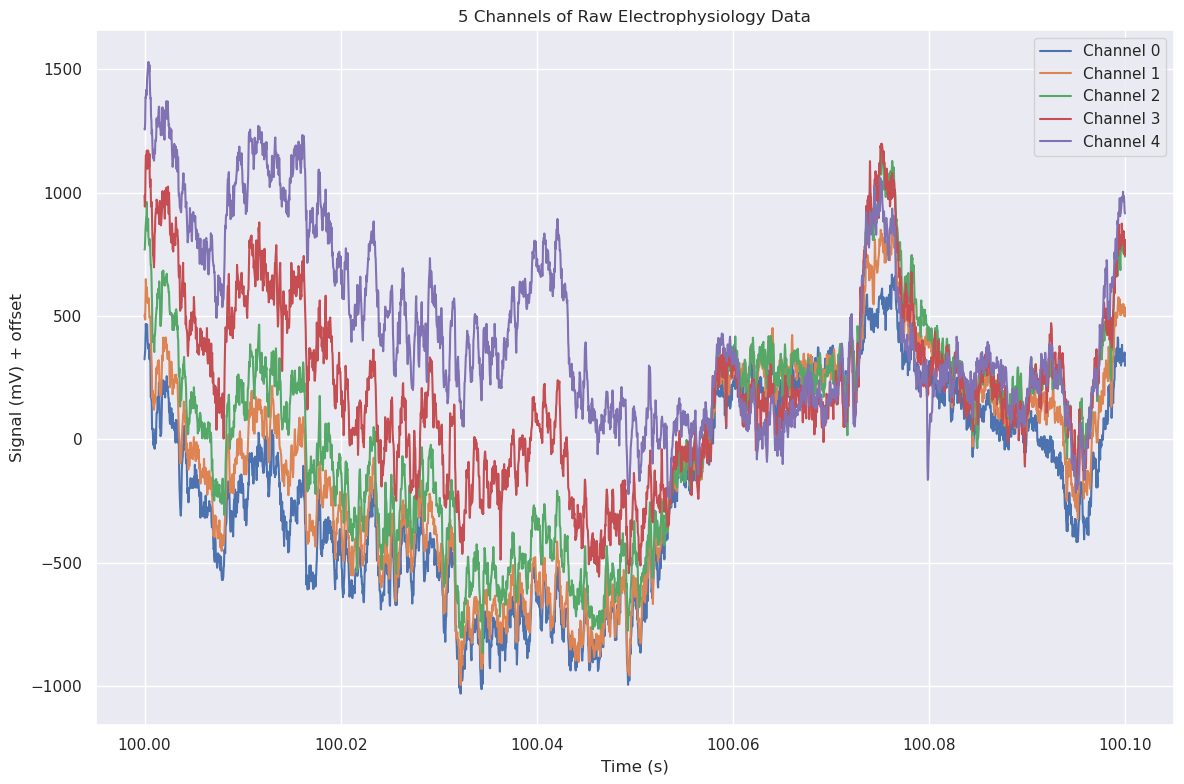

In [5]:
# Get information about the raw data
time_series = nwb.acquisition["time_series"]
print(f"Data shape: {time_series.data.shape}")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Units: {time_series.unit}")
print(f"Duration: {time_series.data.shape[0] / time_series.rate:.2f} seconds")

# Plot a small segment of data from a few channels
# We'll get 0.1 seconds (3000 samples) of data from the first 5 channels
sample_duration = 0.1  # seconds
start_time = 100  # seconds (arbitrary starting point to avoid potential artifacts at the beginning)
start_idx = int(start_time * time_series.rate)
end_idx = start_idx + int(sample_duration * time_series.rate)
channels_to_plot = 5

# Load a subset of the data
data_subset = time_series.data[start_idx:end_idx, :channels_to_plot]

# Create time axis
time_axis = np.arange(data_subset.shape[0]) / time_series.rate + start_time

# Plot the data
plt.figure(figsize=(12, 8))
for i in range(channels_to_plot):
    # Offset each channel for better visibility
    plt.plot(time_axis, data_subset[:, i] + i*200, label=f"Channel {i}")

plt.xlabel("Time (s)")
plt.ylabel(f"Signal ({time_series.unit}) + offset")
plt.title(f"{channels_to_plot} Channels of Raw Electrophysiology Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Trial Information

This dataset includes trial information, which corresponds to laps the mouse ran in a virtual hallway. Let's examine and visualize this information:

Number of trials: 387

Trial information (first 5 trials):
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Trial duration statistics (seconds):
count    387.000000
mean      12.300654
std        8.968260
min        7.656600
25%        9.964817
50%       10.857600
75%       12.095133
max      164.306967
Name: duration, dtype: float64


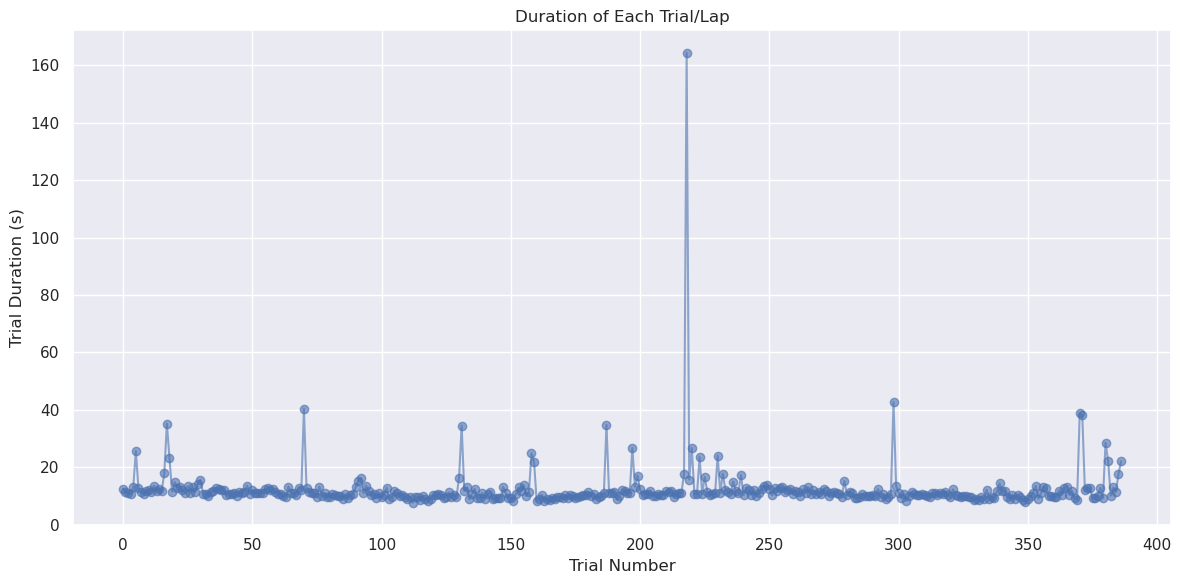

In [6]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("\nTrial information (first 5 trials):")
print(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']
print("\nTrial duration statistics (seconds):")
print(trials_df['duration'].describe())

# Plot trial durations
plt.figure(figsize=(12, 6))
plt.plot(trials_df.index, trials_df['duration'], marker='o', linestyle='-', alpha=0.6)
plt.xlabel('Trial Number')
plt.ylabel('Trial Duration (s)')
plt.title('Duration of Each Trial/Lap')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot above shows the duration of each trial/lap. This gives us insight into how the animal's behavior varied throughout the recording session.

## Exploring Neural Units

This dataset contains information about individual neural units (neurons) that were recorded during the experiment. Let's explore these units and their spiking activity:

In [7]:
# Get units information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print("\nUnits table:")
print(units_df.head())

Number of units: 33

Units table:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


Let's look at the spike times for a few units and visualize their activity:

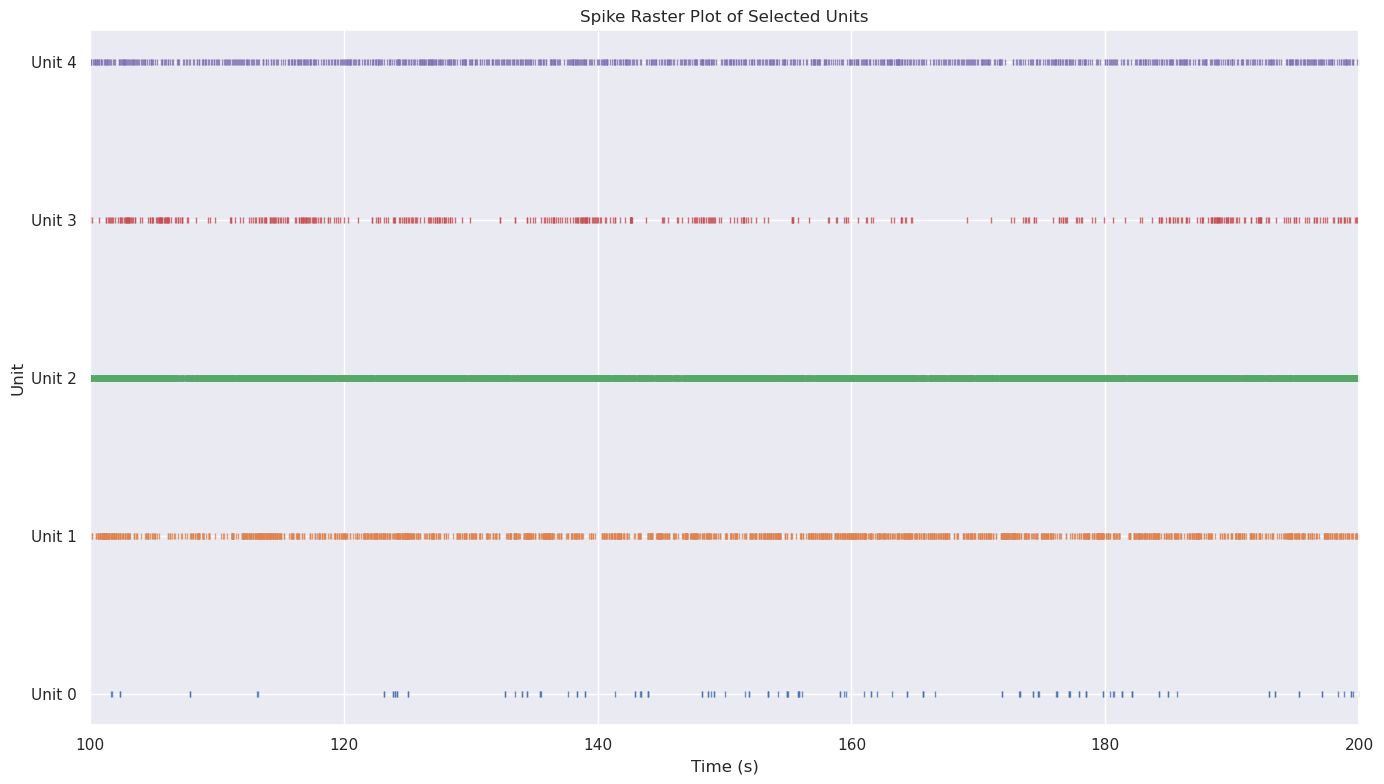

In [8]:
# Function to get spike times for a specific unit
def get_spike_times(unit_id):
    return nwb.units['spike_times'][unit_id]

# Select a few units to examine
units_to_plot = 5
selected_units = list(range(min(units_to_plot, len(units_df))))

# Create a raster plot of spike times
plt.figure(figsize=(14, 8))

for i, unit_id in enumerate(selected_units):
    # Get spike times for this unit
    spike_times = get_spike_times(unit_id)
    
    # Plot spike times as a raster plot
    plt.plot(spike_times, np.ones_like(spike_times) * i, '|', markersize=5, 
             label=f"Unit {unit_id}", alpha=0.8)

plt.xlabel("Time (s)")
plt.ylabel("Unit")
plt.yticks(range(len(selected_units)), [f"Unit {unit}" for unit in selected_units])
plt.title("Spike Raster Plot of Selected Units")
plt.xlim(100, 200)  # Limit to 100 seconds for better visibility
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

Let's calculate and visualize the firing rates of these units:

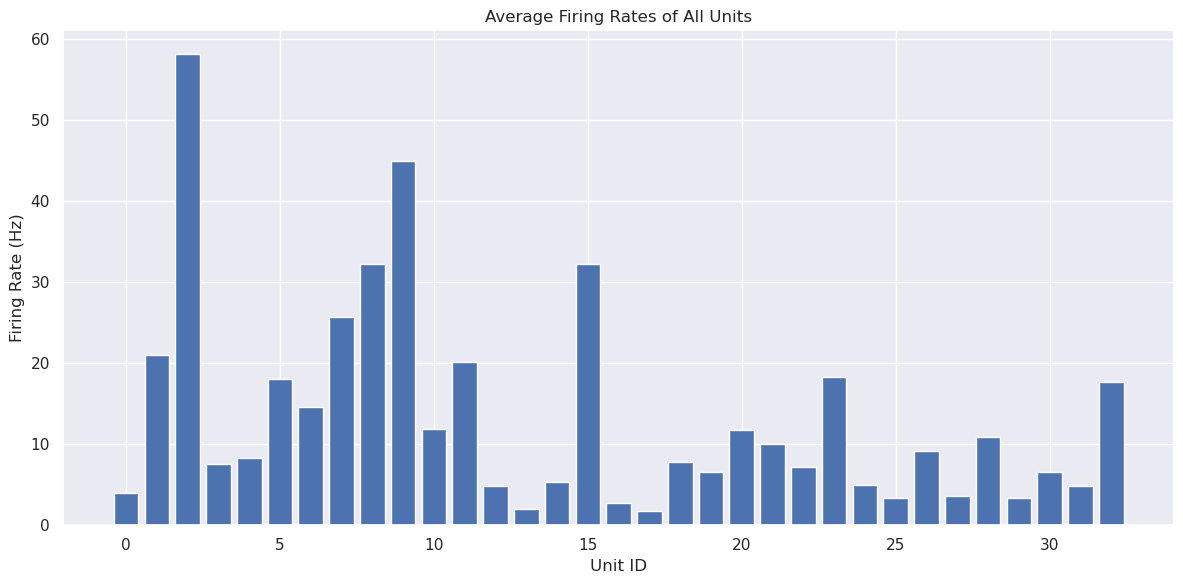

In [9]:
# Calculate firing rates for all units
firing_rates = []
unit_ids = []

for i, unit_id in enumerate(range(len(units_df))):
    spike_times = get_spike_times(unit_id)
    
    # Calculate firing rate (spikes per second)
    total_time = nwb.trials['stop_time'][-1]  # Use the end time of the last trial as total recording time
    firing_rate = len(spike_times) / total_time
    
    firing_rates.append(firing_rate)
    unit_ids.append(unit_id)

# Plot firing rates
plt.figure(figsize=(12, 6))
plt.bar(unit_ids, firing_rates)
plt.xlabel('Unit ID')
plt.ylabel('Firing Rate (Hz)')
plt.title('Average Firing Rates of All Units')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Relating Neural Activity to Behavior (Trials)

Now, let's explore how neural activity relates to the animal's behavior by examining spiking activity during different trials:

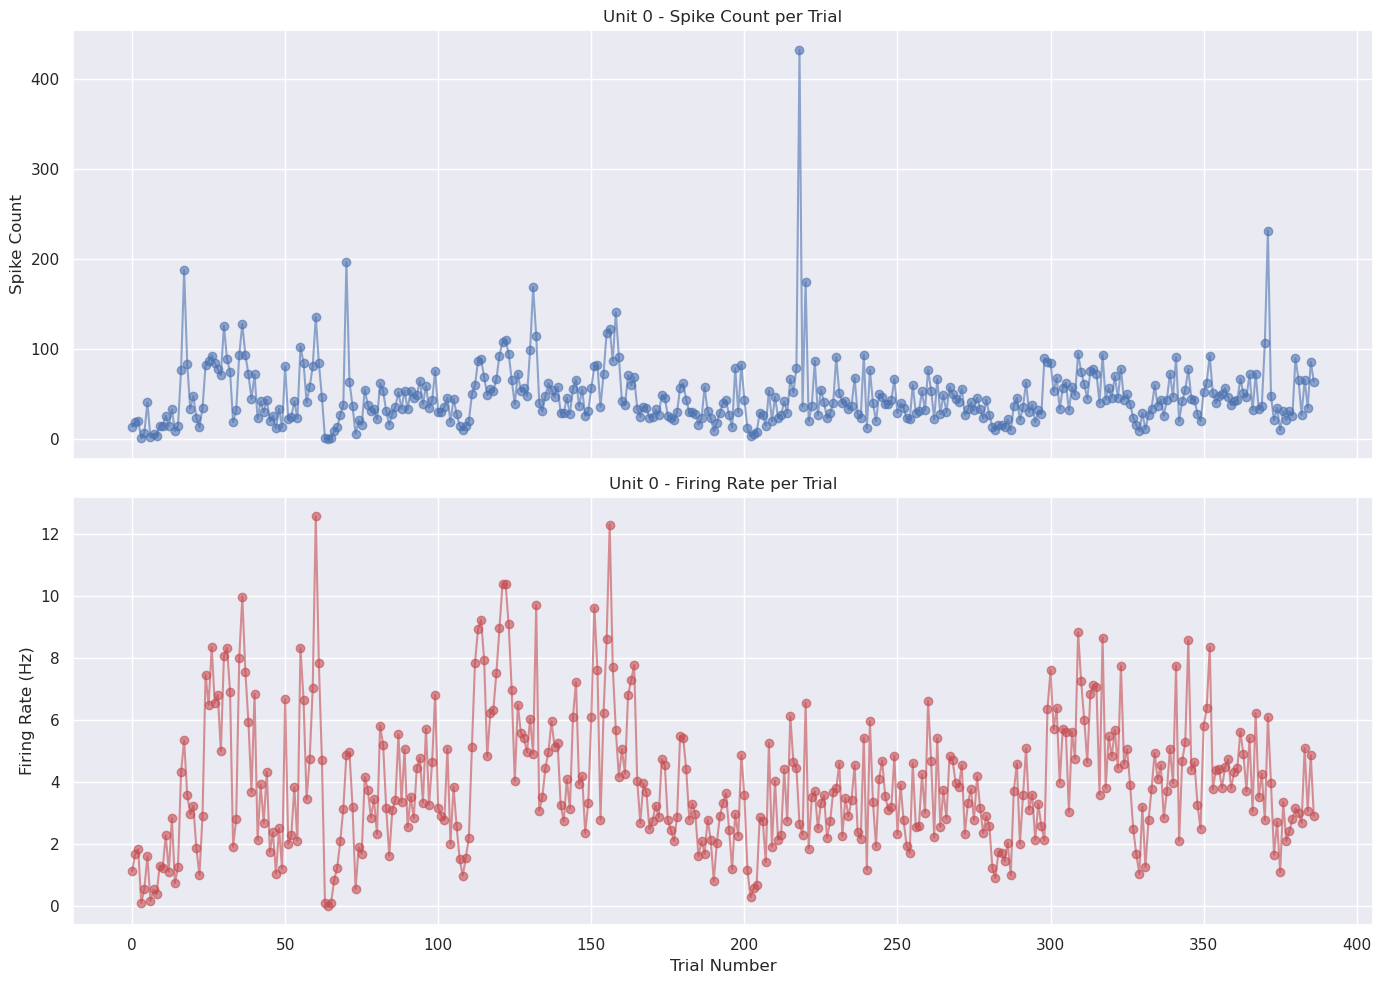

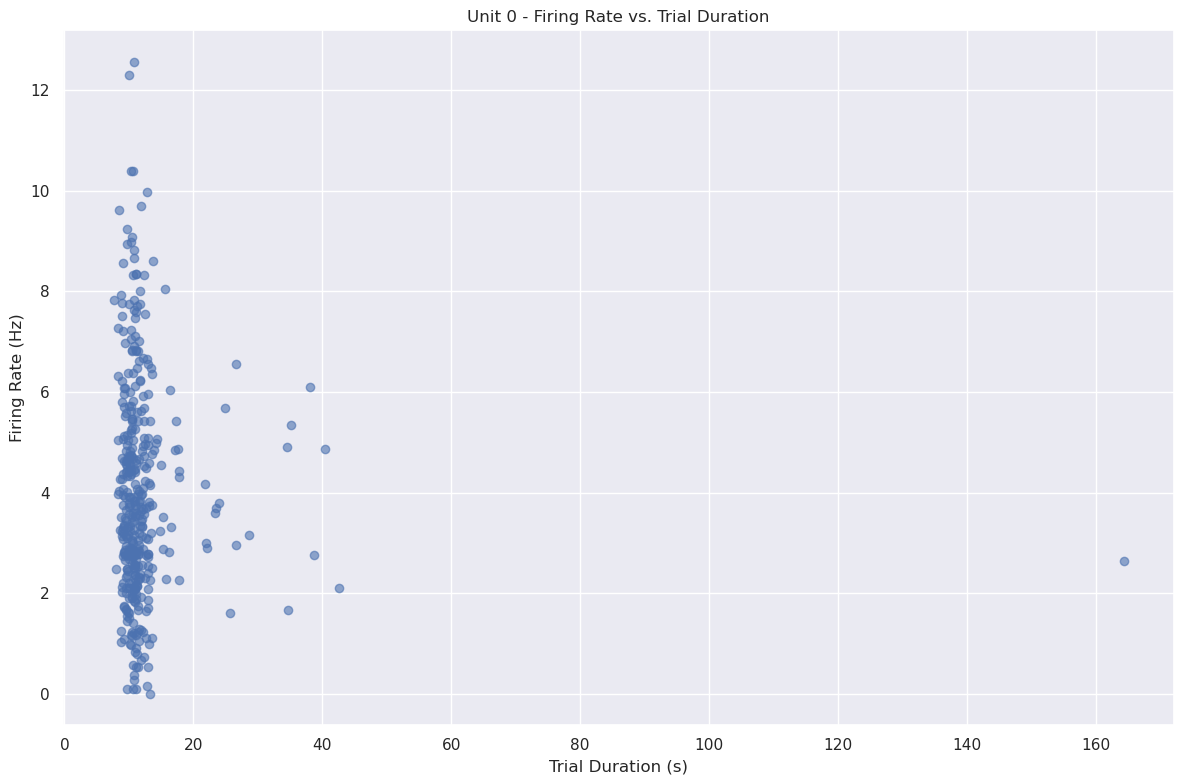

In [10]:
# Select one unit for analysis
unit_to_analyze = 0  # We'll use the first unit
spike_times = get_spike_times(unit_to_analyze)

# Create a function to find spikes within each trial
def spikes_in_trial(spike_times, start_time, stop_time):
    mask = (spike_times >= start_time) & (spike_times <= stop_time)
    return spike_times[mask]

# Calculate spikes per trial for the selected unit
trial_spike_counts = []
trial_firing_rates = []

for _, trial in trials_df.iterrows():
    start_time = trial['start_time']
    stop_time = trial['stop_time']
    duration = stop_time - start_time
    
    trial_spikes = spikes_in_trial(spike_times, start_time, stop_time)
    trial_spike_counts.append(len(trial_spikes))
    trial_firing_rates.append(len(trial_spikes) / duration)

# Add results to the trials_df
trials_df[f'unit_{unit_to_analyze}_spikes'] = trial_spike_counts
trials_df[f'unit_{unit_to_analyze}_firing_rate'] = trial_firing_rates

# Plot spike counts and firing rates across trials
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot spike counts
ax1.plot(trials_df.index, trials_df[f'unit_{unit_to_analyze}_spikes'], marker='o', linestyle='-', alpha=0.6)
ax1.set_ylabel('Spike Count')
ax1.set_title(f'Unit {unit_to_analyze} - Spike Count per Trial')
ax1.grid(True)

# Plot firing rates
ax2.plot(trials_df.index, trials_df[f'unit_{unit_to_analyze}_firing_rate'], marker='o', linestyle='-', color='r', alpha=0.6)
ax2.set_xlabel('Trial Number')
ax2.set_ylabel('Firing Rate (Hz)')
ax2.set_title(f'Unit {unit_to_analyze} - Firing Rate per Trial')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Let's examine if there's a relationship between trial duration and firing rate
plt.figure(figsize=(12, 8))
plt.scatter(trials_df['duration'], trials_df[f'unit_{unit_to_analyze}_firing_rate'], alpha=0.6)
plt.xlabel('Trial Duration (s)')
plt.ylabel('Firing Rate (Hz)')
plt.title(f'Unit {unit_to_analyze} - Firing Rate vs. Trial Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

## Advanced Visualization: Combining Multiple Units Activity

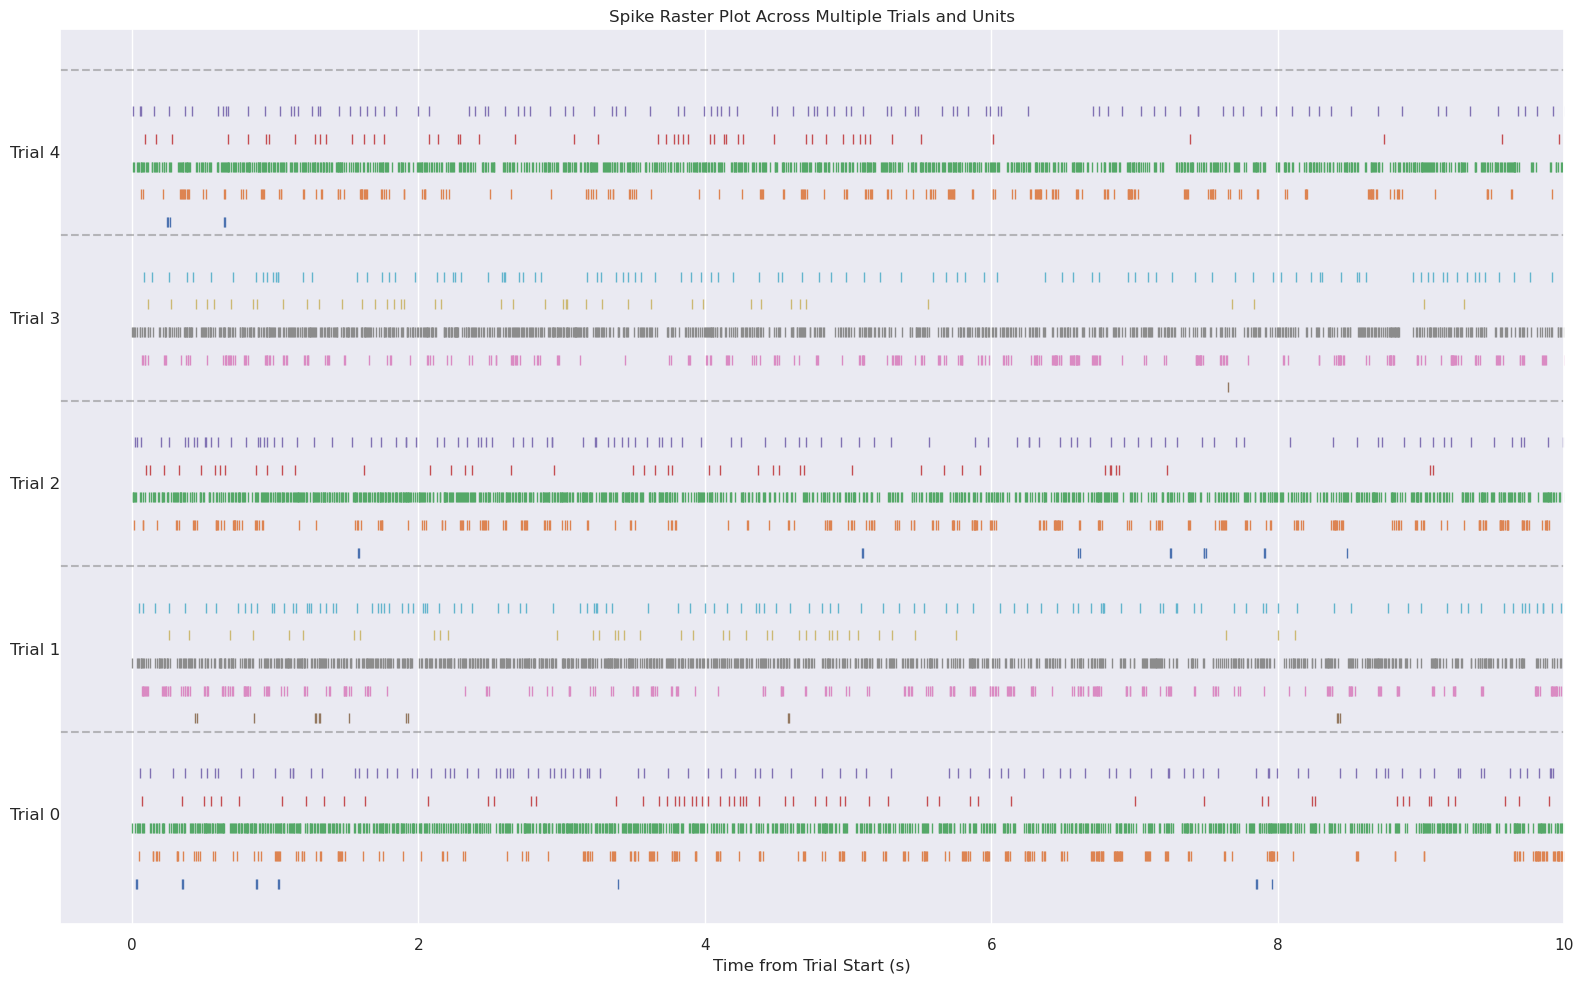

In [11]:
# Select a few trials to visualize
num_trials_to_plot = 5
selected_trials = trials_df.iloc[:num_trials_to_plot]

# Select a few units to visualize
num_units_to_plot = 5
selected_unit_ids = list(range(min(num_units_to_plot, len(units_df))))

# Create a more complex visualization showing multiple units across selected trials
plt.figure(figsize=(16, 10))

# For each trial
for i, (trial_idx, trial) in enumerate(selected_trials.iterrows()):
    start_time = trial['start_time']
    stop_time = trial['stop_time']
    
    # For each unit
    for j, unit_id in enumerate(selected_unit_ids):
        # Get spike times for this unit
        all_spike_times = get_spike_times(unit_id)
        
        # Filter spikes for this trial
        trial_spikes = spikes_in_trial(all_spike_times, start_time, stop_time)
        
        # Normalize spike times to the trial start
        normalized_spikes = trial_spikes - start_time
        
        # Plot spikes
        plt.plot(normalized_spikes, 
                 np.ones_like(normalized_spikes) * (i * (num_units_to_plot + 1) + j), 
                 '|', 
                 markersize=7, 
                 label=f"Trial {trial_idx}, Unit {unit_id}" if j == 0 and i == 0 else "")

    # Add trial separator lines
    plt.axhline(y=(i+1) * (num_units_to_plot + 1) - 0.5, 
                color='gray', 
                linestyle='--', 
                alpha=0.5)
    
    # Add trial label
    plt.text(-0.5, i * (num_units_to_plot + 1) + num_units_to_plot/2, 
             f"Trial {trial_idx}", 
             horizontalalignment='right', 
             verticalalignment='center')

plt.xlabel("Time from Trial Start (s)")
plt.yticks([])
plt.title("Spike Raster Plot Across Multiple Trials and Units")
plt.xlim(-0.5, 10)  # Show 10 seconds from the start of each trial
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## Summary and Future Directions

In this notebook, we explored Dandiset 001375, which contains electrophysiology data from a pilot study investigating the effects of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity. Here's a summary of what we've learned:

1. The dataset contains three NWB files with electrophysiology recordings from mice running in a virtual hallway.
2. We examined one of these files (sub-MS13B) which contained raw electrophysiology data, electrode information, unit spike times, and trial/lap information.
3. We visualized raw data traces, spike times for different units, and looked at how neural activity varies across trials.

Future directions for analysis could include:

1. **Comparing neural activity pre- and post-DREADD activation**: Since this study investigates the effect of DREADDs on neural activity, analyzing how neural activity patterns change after DREADD activation would be a key analysis.

2. **Spatial coding analysis**: Since the animals are running laps in a virtual hallway, examining place cell activity and spatial coding would be relevant.

3. **Cross-area correlations**: Analyzing correlations between activity in the hippocampus and visual cortex could provide insights into how disrupting septal GABAergic activity affects communication between brain regions.

4. **Population dynamics**: Conducting principal component analysis (PCA) or similar dimensionality reduction techniques on the population activity to understand the collective dynamics of the recorded neurons.

5. **Spectral analysis**: Examining local field potentials (LFPs) to identify changes in different frequency bands (theta, gamma, etc.) that might be affected by DREADD manipulation.

6. **Comparison between subjects**: Analyzing and comparing data from all three NWB files to identify consistent effects and individual variations.

7. **Behavioral correlations**: Analyzing the relationship between neural activity and behavioral metrics such as running speed or lap duration.